In [5]:
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt
plt.style.use('seaborn')

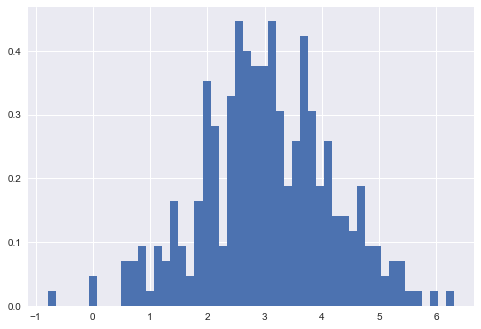

In [6]:
N = 300
data_X = np.random.normal(loc=3, scale=1.2, size=N)

plt.hist(data_X, bins=50, histtype='stepfilled', normed=True)
plt.show()

In [7]:
# Model:
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0, upper=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    observation = pm.Normal('observation', mu=mu, tau=1./sigma**2, observed=data_X)
    
with model:
    # start = pm.find_MAP()
    step = pm.Metropolis(vars=[mu, sigma, observation])
    trace = pm.sample(10000, step=step)

100%|██████████| 10500/10500 [00:02<00:00, 3875.51it/s]


In [9]:
trace_mu = trace['mu']
trace_sigma = trace['sigma']
# trace_observation = trace['observation']

print(trace.varnames)
print(trace_mu.mean())
print(trace_sigma.mean())

['mu_interval__', 'sigma_interval__', 'mu', 'sigma']
3.03875552661
1.14284923606
